

---

---




▶**TASK 4:- SALES PREDICTION USING PYTHON**

> Author: CHANDRAHAS K

> Batch: NOVEMBER

> Domain: Data Science

> Aim: Sales prediction involving forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

## Importing the Required Library packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Reading The  Data File

In [2]:
df=pd.read_csv('/content/advertising.xls')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


#DATA ANALYSIS

In [3]:
#to check number of columns and rows in the dataframes
df.shape

(200, 4)

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


>Avg expense spend is highest on TV.

>Avg expense spend is lowest on Radio.

>Max sale is 27 and min is 1.6



In [5]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#check the number of missing values in each column
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#DATA VISUALISATION

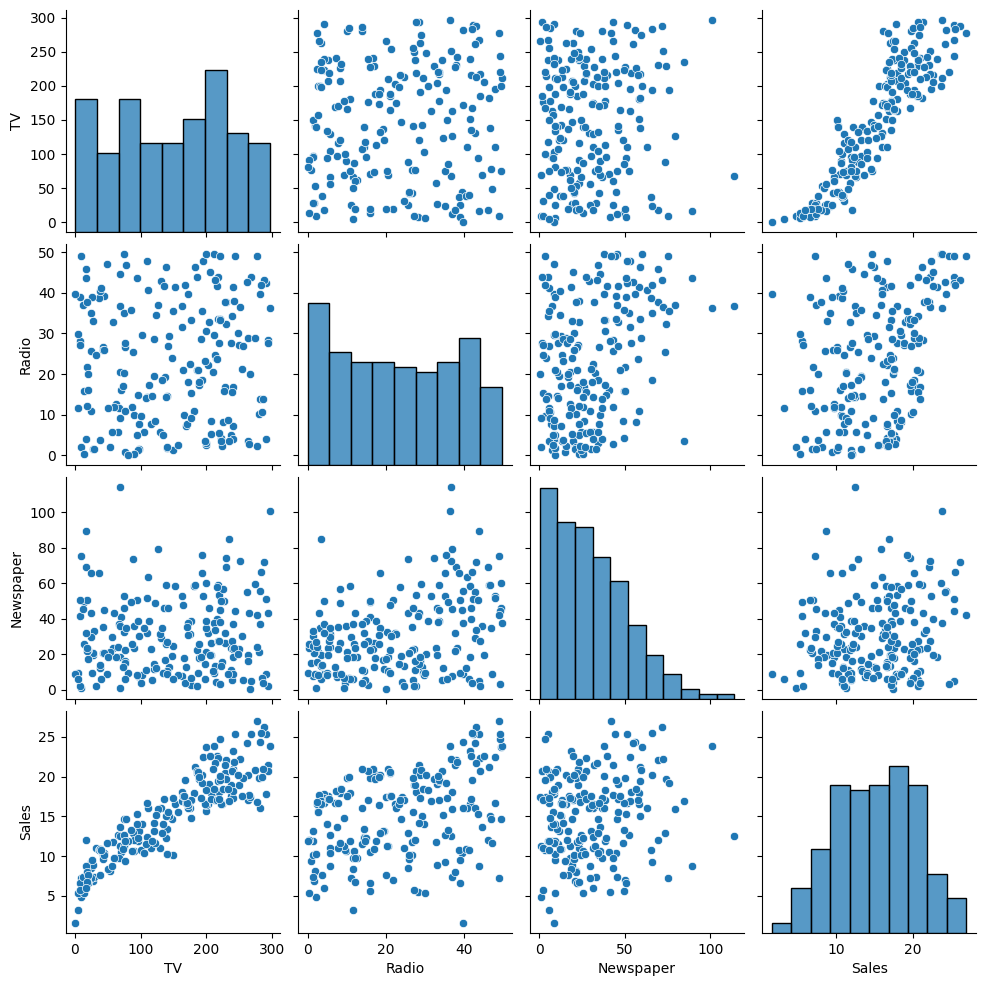

In [7]:
# Create a pair plot
sns.pairplot(df)
plt.show()

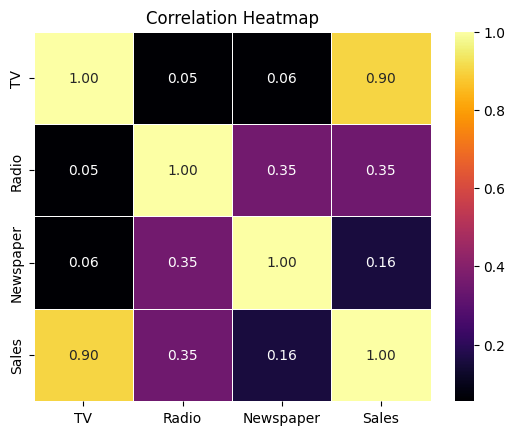

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**SALES IS HIGHLY CO RELATED WITH THE TV**

#**Model Training and Evaluation**

In [9]:
X = df[['TV', 'Newspaper', 'Radio']]
y = df['Sales']

In [10]:
X.head()

,TV,Newspaper,Radio
0,230.1,69.2,37.8
1,44.5,45.1,39.3
2,17.2,69.3,45.9
3,151.5,58.5,41.3
4,180.8,58.4,10.8


In [11]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

**Create and train a linear regression model and Make predictions on the test set**

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=69)

In [13]:
model = LinearRegression()
model.fit(X_train , y_train )
y_pred = model.predict(X_test)

 **Evaluate the model and Print the Evaluation metrics.**

In [14]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.8353886074588186
Mean Absolute Error: 1.072185189954908
R-squared: 0.9284121647240768


# Visualize actual vs. predicted values

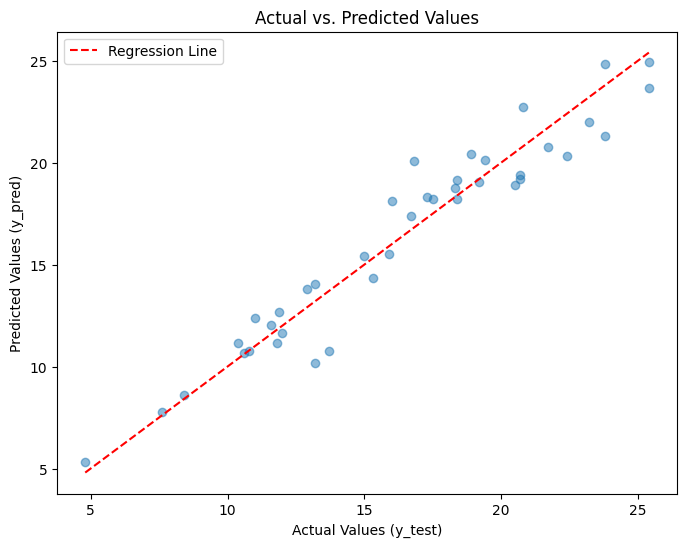

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
regression_line_x = np.linspace(min(y_test), max(y_test), 100)
regression_line_y = regression_line_x
plt.plot(regression_line_x, regression_line_y, color='red', linestyle='--', label="Regression Line")
plt.legend()
plt.show()

# Save predicited data to CSV

In [16]:
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predictions.to_csv('sales_prediction.csv', index=False)